0     2019년 1분기  2019년 2분기  2019년 3분기  2019년 4분기  2020년 1분기  2020년 2분기  \
지역별1                                                                     
기타       3698.0     4464.0     3086.0     4220.0     3138.0     4328.0   
대양주      1962.0     2228.0     1792.0     2076.0     1574.0     2564.0   
북미      32362.0    37748.0    38260.0    41894.0    36074.0    61340.0   
아시아    235900.0   285760.0   280992.0   298844.0   193040.0   195108.0   
아프리카        0.0        0.0        0.0        0.0        0.0        0.0   
유럽       5886.0     6808.0     4590.0     7118.0     7082.0     8802.0   
중남미      2516.0     3502.0     2184.0     2656.0     2594.0     2878.0   
합계     282324.0   340510.0   330904.0   356808.0   243502.0   274978.0   

0     2020년 3분기  2020년 4분기  2021년 1분기  2021년 2분기  2021년 3분기  2021년 4분기  \
지역별1                                                                     
기타       4158.0     6810.0    11266.0    21294.0    13302.0    10508.0   
대양주      3270.0     3694.0     3894.0

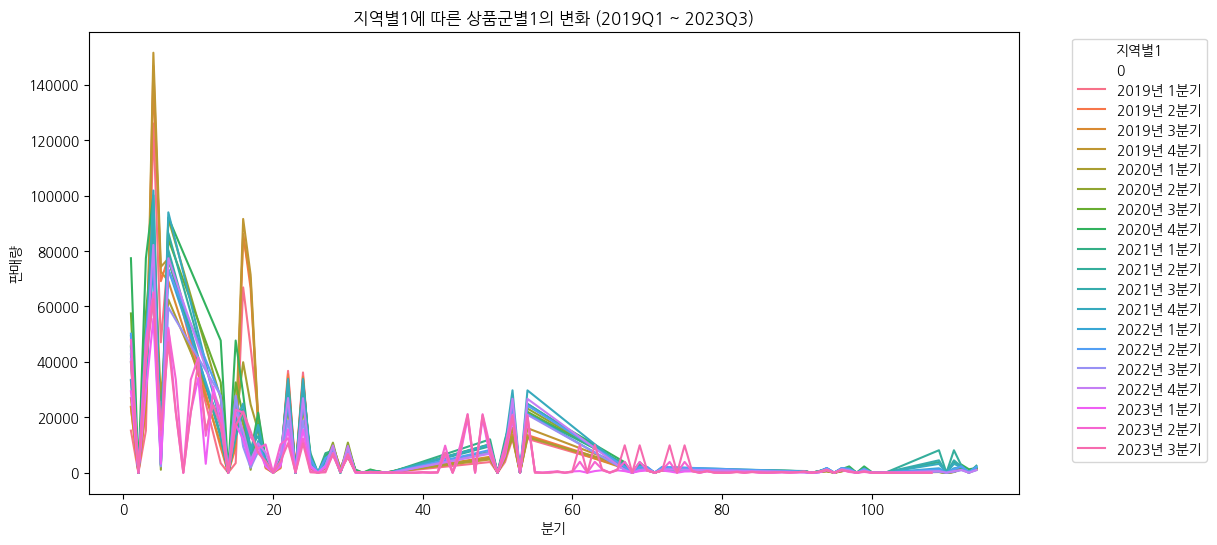

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

# 경고 메시지 숨기기
warnings.filterwarnings("ignore")
# 한글폰트 안깨지게 하기
mpl.rcParams['font.family'] = 'NanumGothic'

# CSV 파일을 읽어오기
file_path = './data/extract_data.csv'  # 실제 파일 경로로 변경해주세요
df = pd.read_csv(file_path, header=None)

# 첫 번째 행을 헤더로 설정
df.columns = df.iloc[0]

# '지역별1'이나 '상품군별1'이 특정 값에 해당하는 행만 선택
selected_regions = ['합계', '아시아', '북미', '유럽', '대양주', '중남미', '아프리카', '기타']
selected_categories = ['의류 및 패션 관련 상품', '음반·비디오·악기']

filtered_df = df[df['지역별1'].isin(selected_regions) & df['상품군별1'].isin(selected_categories)]

# '2019년 1분기'부터 '2023년 3분기'까지의 col 선택
start_column = '2019년 1분기'
end_column = '2023년 3분기'
selected_columns = df.columns[(df.columns == '지역별1') | (df.columns >= start_column) & (df.columns <= end_column)]
filtered_df = filtered_df[selected_columns]

# 숫자로 변환
numeric_columns = filtered_df.columns[1:]  # '지역별1' 열은 제외
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# -인 데이터 0으로 바꿔주기
filtered_df[numeric_columns] = filtered_df[numeric_columns].apply(lambda x: x.clip(lower=0))

# 데이터를 '지역별1'을 기준으로 그룹화
grouped_df = filtered_df.groupby('지역별1').sum()
print(grouped_df)

# Line plot 그리기
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=filtered_df, dashes=False)
# plt.title('지역별1에 따른 상품군별1의 변화 (2019Q1 ~ 2023Q3)')
# plt.xlabel('분기')
# plt.ylabel('판매량')
# plt.legend(title='지역별1', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

# 경고 메시지 숨기기
warnings.filterwarnings("ignore")
# 한글폰트 안깨지게 하기
mpl.rcParams['font.family'] = 'NanumGothic'

In [91]:
# CSV 파일을 읽어오기
file_path = './data/extract_data.csv'  # 실제 파일 경로로 변경해주세요
df = pd.read_csv(file_path, header=None)

# 첫 번째 행을 헤더로 설정
df.columns = df.iloc[0]

filtered_df = df[df['지역별1'].isin(selected_regions) & df['상품군별1'].isin(selected_categories)]
# '상품군별1'이 '의류 및 패션 관련 상품'이면서 '판매유형별'이 '계'인 행만 선택
filtered_df = filtered_df[(filtered_df['상품군별1'] == '의류 및 패션 관련 상품') & (filtered_df['판매유형별1'] == '계')]

selected_regions = ['합계', '아시아', '북미', '유럽', '대양주', '중남미', '아프리카', '기타']

# 지역별1이 selected_regions에 있고 상품군별이 '의류 및 패션 관련 상품'이면서 판매유형별이 '계'인 data 필터링
passion_filtered_df = filtered_df[filtered_df['지역별1'].isin(selected_regions) & (filtered_df['상품군별1'] == '의류 및 패션 관련 상품') & (filtered_df['판매유형별1'] == '계')]

quater = ['2019년 1분기', '2019년 2분기', '2019년 3분기', '2019년 4분기', '2020년 1분기', '2020년 2분기', '2020년 3분기', 
               '2020년 4분기', '2021년 1분기', '2021년 2분기', '2021년 3분기', '2021년 4분기', '2022년 1분기', '2022년 2분기', '2022년 3분기', '2022년 4분기', '2023년 1분기', '2023년 2분기', '2023년 3분기']
for i in range(1, 20):
    # 지역이 아시아이고 지역별2가 소계가 아닌 행들(중국, 일본, 아세안, 중동, 기타 아시아)들의 분기별 data값을 sum해준 뒤 아시아, 지역별2 == 소계인 칸에 넣어주기
    other_rows_sum = filtered_df[(filtered_df['지역별1'] == '아시아') & (filtered_df['지역별2'] != '소계')][quater[i-1]].apply(pd.to_numeric, errors='coerce').sum()

    passion_filtered_df.iloc[1, i+5]= other_rows_sum
passion_filtered_df

,지역별1,지역별2,지역별3,상품군별1,상품군별2,판매유형별1,2019년 1분기,2019년 2분기,2019년 3분기,2019년 4분기,...,2021년 2분기,2021년 3분기,2021년 4분기,2022년 1분기,2022년 2분기,2022년 3분기,2022년 4분기,2023년 1분기,2023년 2분기,2023년 3분기
4,합계,소계,소계,의류 및 패션 관련 상품,소계,계,125969,146698,141668,151505,...,91319,89544,101807,75954,76116,61879,82176,55579,65070,62563
10,아시아,소계,소계,의류 및 패션 관련 상품,소계,계,110340.0,129311.0,125518.0,131933.0,...,60358.0,59481.0,66833.0,49317.0,45611.0,37444.0,52019.0,34203,41564,39709
16,아시아,중국,소계,의류 및 패션 관련 상품,소계,계,66854,86183,85684,91546,...,21630,22271,24964,13650,12628,9391,15098,12099,21665,22112
22,아시아,일본,소계,의류 및 패션 관련 상품,소계,계,36739,35529,31897,30472,...,31239,28172,33780,26977,25238,18788,26942,15593,12455,10655
28,아시아,아세안,소계,의류 및 패션 관련 상품,소계,계,6537,7278,7768,9664,...,7131,8619,7816,8506,7493,9113,9854,6304,7174,6706
34,아시아,중동,소계,의류 및 패션 관련 상품,소계,계,210,321,169,251,...,358,419,273,184,252,152,125,80,89,83
40,아시아,기타 아시아,소계,의류 및 패션 관련 상품,소계,계,-,-,-,-,...,-,-,-,-,-,-,-,127,181,153
46,북미,소계,소계,의류 및 패션 관련 상품,소계,계,-,-,-,-,...,-,-,-,-,-,-,-,19545,21176,20839
52,북미,미국,소계,의류 및 패션 관련 상품,소계,계,12324,13683,13368,16161,...,24814,24861,29729,21271,24333,20933,26685,19074,20953,20366
58,북미,캐나다,소계,의류 및 패션 관련 상품,소계,계,-,-,-,-,...,-,-,-,-,-,-,-,471,223,473


0
2019년 1분기    110340.0
2019년 2분기    129311.0
2019년 3분기    125518.0
2019년 4분기    131933.0
2020년 1분기     73143.0
2020년 2분기     62810.0
2020년 3분기     60948.0
2020년 4분기     70091.0
2021년 1분기     57076.0
2021년 2분기     60358.0
2021년 3분기     59481.0
2021년 4분기     66833.0
2022년 1분기     49317.0
2022년 2분기     45611.0
2022년 3분기     37444.0
2022년 4분기     52019.0
2023년 1분기       34203
2023년 2분기       41564
2023년 3분기       39709
Name: 10, dtype: object


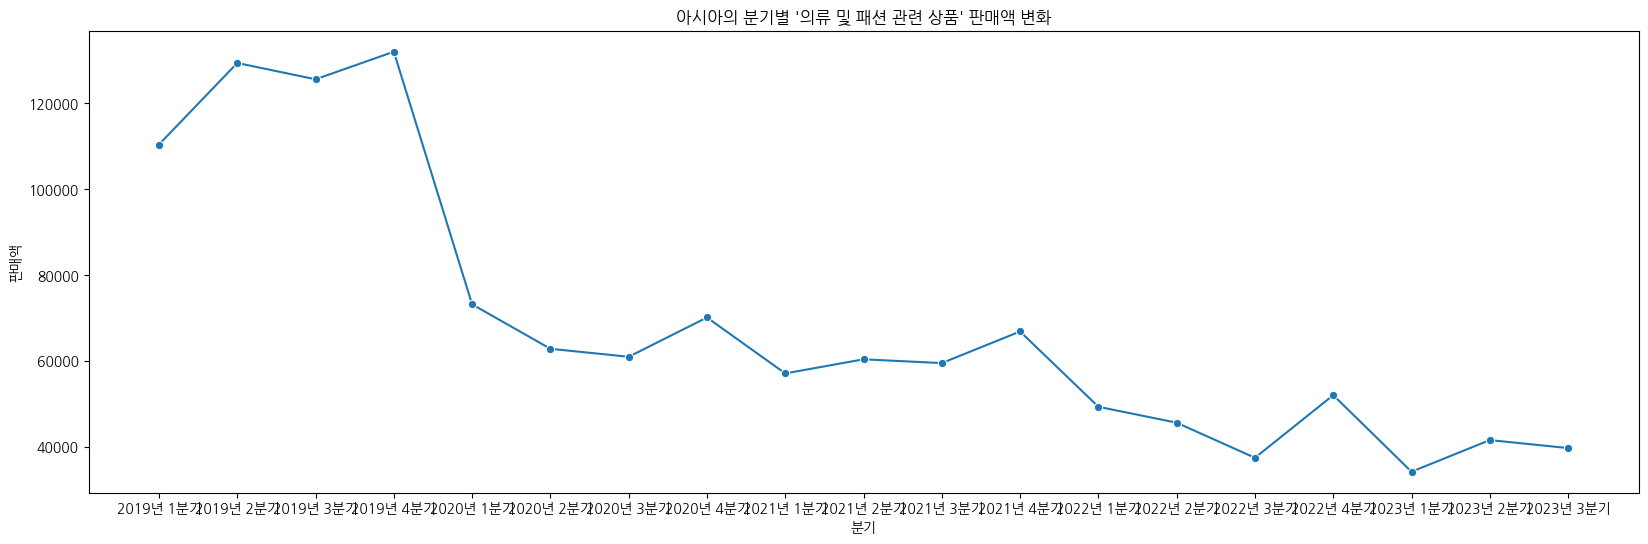

In [79]:
# '아시아'의 분기별 판매액 선택 (2번째 행)
asia_sales = passion_filtered_df.iloc[1, 6:]
print(asia_sales)

# Line plot 그리기
plt.figure(figsize=(20, 6))
sns.lineplot(x=asia_sales.index, y=asia_sales.values, marker='o')
plt.title('아시아의 분기별 \'의류 및 패션 관련 상품\' 판매액 변화')
plt.xlabel('분기')
plt.ylabel('판매액')
plt.show()

In [82]:
# CSV 파일을 읽어오기
file_path = './data/extract_data.csv'  # 실제 파일 경로로 변경해주세요
df = pd.read_csv(file_path, header=None)

# 첫 번째 행을 헤더로 설정
df.columns = df.iloc[0]

filtered_df = df[(df['상품군별1'] == '음반·비디오·악기') & (df['판매유형별1'] == '계')]
# '지역별1'이나 '상품군별1'이 특정 값에 해당하는 행만 선택
selected_regions = ['합계', '아시아', '북미', '유럽', '대양주', '중남미', '아프리카', '기타']

music_filtered_df = filtered_df[filtered_df['지역별1'].isin(selected_regions) & (filtered_df['상품군별1'] == '음반·비디오·악기') & (filtered_df['판매유형별1'] == '계')]

quater = ['2019년 1분기', '2019년 2분기', '2019년 3분기', '2019년 4분기', '2020년 1분기', '2020년 2분기', '2020년 3분기', 
               '2020년 4분기', '2021년 1분기', '2021년 2분기', '2021년 3분기', '2021년 4분기', '2022년 1분기', '2022년 2분기', '2022년 3분기', '2022년 4분기', '2023년 1분기', '2023년 2분기', '2023년 3분기']
for i in range(1, 20):
    other_rows_sum = filtered_df[(filtered_df['지역별1'] == '아시아') & (filtered_df['지역별2'] != '소계')][quater[i-1]].apply(pd.to_numeric, errors='coerce').sum()

    music_filtered_df.iloc[1, i+5]= other_rows_sum
music_filtered_df

,지역별1,지역별2,지역별3,상품군별1,상품군별2,판매유형별1,2019년 1분기,2019년 2분기,2019년 3분기,2019년 4분기,...,2021년 2분기,2021년 3분기,2021년 4분기,2022년 1분기,2022년 2분기,2022년 3분기,2022년 4분기,2023년 1분기,2023년 2분기,2023년 3분기
1,합계,소계,소계,음반·비디오·악기,소계,계,15193,23557,23784,26899,...,49336,39827,42753,33512,50150,44072,41097,29374,47929,40025
7,아시아,소계,소계,음반·비디오·악기,소계,계,7610.0,13569.0,14978.0,17489.0,...,27410.0,21349.0,26587.0,22731.0,36774.0,34258.0,31854.0,21860,33582,21745
13,아시아,중국,소계,음반·비디오·악기,소계,계,3447,9077,10470,13199,...,18993,12679,17863,16443,27632,27817,21995,17415,22768,17158
19,아시아,일본,소계,음반·비디오·악기,소계,계,2433,1632,2592,2055,...,3575,4303,4157,3312,3512,3646,7202,2315,10196,4109
25,아시아,아세안,소계,음반·비디오·악기,소계,계,1524,2546,1689,1875,...,4490,4000,4256,2765,5277,2550,2528,2035,573,142
31,아시아,중동,소계,음반·비디오·악기,소계,계,206,314,227,360,...,352,367,311,211,353,245,129,95,45,336
37,아시아,기타 아시아,소계,음반·비디오·악기,소계,계,-,-,-,-,...,-,-,-,-,-,-,-,0,0,0
43,북미,소계,소계,음반·비디오·악기,소계,계,-,-,-,-,...,-,-,-,-,-,-,-,6364,9770,7295
49,북미,미국,소계,음반·비디오·악기,소계,계,3857,5191,5762,4786,...,9541,10170,10089,7316,8198,7185,6850,6050,9672,7294
55,북미,캐나다,소계,음반·비디오·악기,소계,계,-,-,-,-,...,-,-,-,-,-,-,-,314,98,1


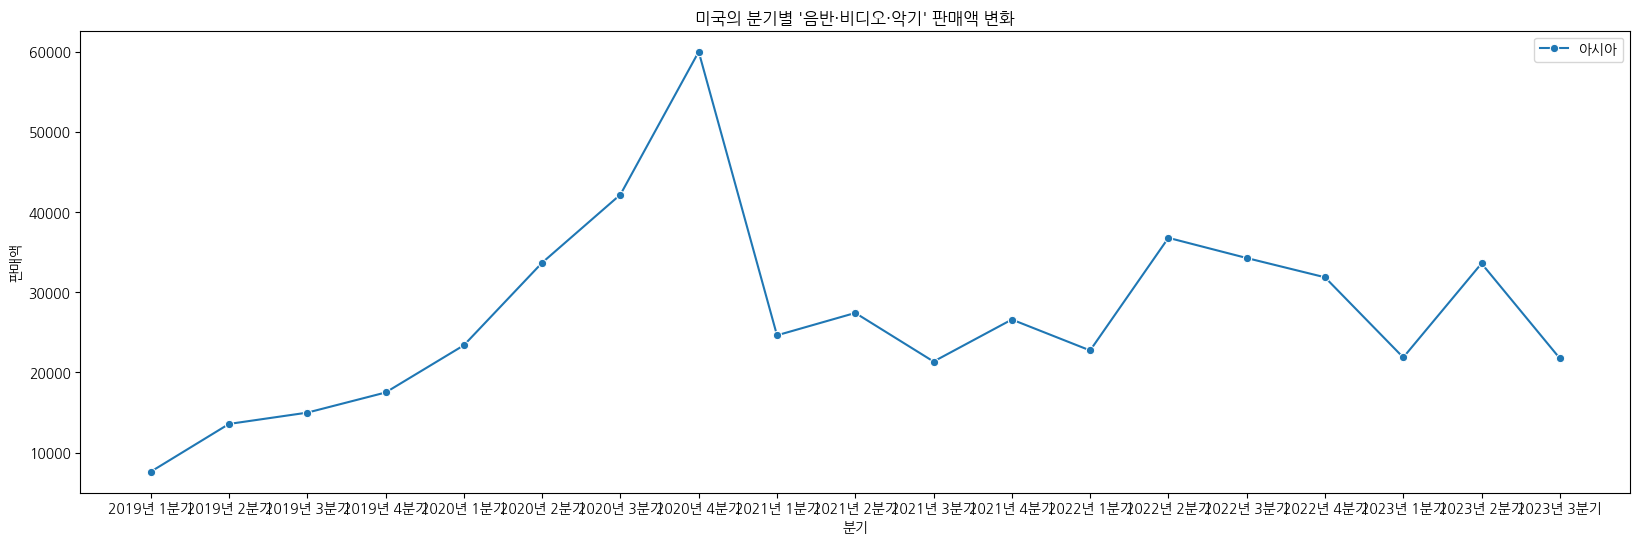

In [93]:
# '아시아'의 분기별 판매액 선택 (2번째 행)
asia_music_sales = music_filtered_df.iloc[1, 6:]

# '미국'의 분기별 판매액 선택 (2번째 행)
# usa_music_sales = music_filtered_df.iloc[8, 6:]
# print(usa_music_sales)

# Line plot 그리기
plt.figure(figsize=(20, 6))
sns.lineplot(x=asia_music_sales.index, y=asia_music_sales.values, marker='o', label='아시아')
# sns.lineplot(x=usa_music_sales.index, y=usa_music_sales, marker='o', label='미국')
plt.title('미국의 분기별 \'음반·비디오·악기\' 판매액 변화')
# plt.yscale('log')
plt.xlabel('분기')
plt.ylabel('판매액')
plt.show()